# Exercise 06:  FAST Algorithm - Features from Accelerated Segment Test
**Objectives of the lesson:**

1. Load .bmp Image
2. FAST Algorithm 3x3
3. FAST Algorithm 5x5 - Student Exercise
4. Plot Detected Corners

Facts about FAST: https://computer-vision-talks.com/post/2011-01-04-comparison-of-the-opencv-feature-detection-algorithms/

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### 1. Load Image

**Important:** <br>
The loaded file is in .bmp format. The regarding shape is by default 2D. No dimensional pre-processing is needed to prepare image (e.g. RGB-channels).

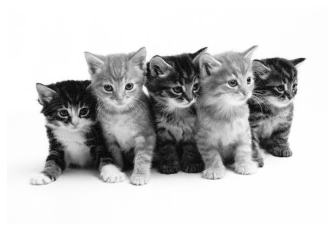

Image shape: (327, 482)


In [3]:
# load image
img = cv2.imread("cat.bmp")
# convert image to grey-scaled image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plot image
plt.imshow(img, cmap='Greys_r')
plt.axis("off")
plt.show()
# .bmp provides two dimensional image shape 
print("Image shape:", img.shape)

### 2. FAST Algorithm 3x3

### 2.1 Extract Pixel Surrounding

**Important:** <br>
The surrounding is returned regarding to radius equals 3.

In [4]:
def get_circle3x3(img, row, col):
    pixels = np.empty(16)

    pixels[0] = img[row-3, col]        # 01
    pixels[1] = img[row-3, col+1]      # 02
    pixels[2] = img[row-2, col+2]      # 03
    pixels[3] = img[row-1, col+3]      # 04
    pixels[4] = img[row, col+3]        # 05
    pixels[5] = img[row+1, col+3]      # 06
    pixels[6] = img[row+2, col+2]      # 07
    pixels[7] = img[row+3, col+1]      # 08
    pixels[8] = img[row+3, col]        # 09
    pixels[9] = img[row+3, col-1]      # 10
    pixels[10] = img[row+2, col-2]     # 11
    pixels[11] = img[row+1, col-3]     # 12
    pixels[12] = img[row, col-3]       # 13
    pixels[13] = img[row-1, col-3]     # 14
    pixels[14] = img[row-2, col-2]     # 15
    pixels[15] = img[row-3, col-1]     # 16

    return pixels

### 2.2 Implementation FAST Logic

**FAST-Kernel 3x3:**<br>
$\;\;$$\;\;$|16|$\;\;$**01**$\;\;$|02|<br>
$\;\;$|15|$\;\;$$\;\;$$\;\;$$\;\;$$\;\;$$\;\;$|03|<br>
|14|$\;\;$$\;\;$$\;\;$$\;\;$$\;\;$$\;\;$$\;\;$$\;\;$|04|<br>
**|13|**$\;\;$$\;\;$$\;\;$**Xi**$\;\;$$\;\;$$\;\;$$\;\;$**|05|**<br>
|12|$\;\;$$\;\;$$\;\;$$\;\;$$\;\;$$\;\;$$\;\;$$\;\;$|06|<br>
$\;\;$|11|$\;\;$$\;\;$$\;\;$$\;\;$$\;\;$$\;\;$|07|<br>
$\;\;$$\;\;$|10|$\;\;$**09**$\;\;$|08|<br>

In [5]:
def FAST3x3(img, threshold):
    # radius of three across horizontal and vertical axes
    rad = 3

    # Fast test pixels - horizontal and vertical pixel lines across center pixel (01, 05, 09, 13)
    ft_pix = [0, 4, 8, 12]
    # Normal test pixels
    nt_pix = [1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15]

    # x-values for returned corner coordinates
    xs = np.array([])
    # y-values for returned corner coordinates
    ys = np.array([])
    
    # iterate through columns of image
    for col in range(rad, np.size(img, 1)-(rad+1)):
        # iterate through rows of image
        for row in range(rad, np.size(img, 0)-(rad+1)):
            # define brightness limits for corner validation
            lbound = img[row, col] - threshold
            ubound = img[row, col] + threshold

            # get pixels important for corner validation
            pixels = get_circle3x3(img, row, col)

            # count how many of the fast test pixels are different
            diff_count = 0
            for pixel in ft_pix:
                #check if pixel are strongly different from centered pixel Xi
                if pixels[pixel] < lbound or pixels[pixel] > ubound:
                    diff_count = diff_count + 1

            # if more than 2 fast test pixels are different test the complete surrounding of Xi
            if diff_count > 2:
                for pixel in nt_pix:
                    if pixels[pixel] < lbound or pixels[pixel] > ubound:
                        diff_count = diff_count + 1
            else:
                continue
                
            if diff_count > 12:
                xs = np.append(xs, col)
                ys = np.append(ys, row)

    return [xs, ys]

## 3. FAST Algorithm 5x5 - Student Exercise<br>
**Description:** Scaled FAST5x5 kernel for FAST algorithm.

### 3.1 Student Exercise I
**Exercise I:** <br>
Implement the get_circle 5x5 function in cell below.

In [9]:
# get pixel values for FAST 5x5 kernel
def get_circle5x5(img, row, col):
    pixels = np.empty(28)

    ####### Student Exercise Start #######
    
    ####### Student Exercise End #######

    return pixels

### 3.2 Student Exercise II

**Exercise II:** <br>
Implement the FAST5x5 function in cell below.<br>
**Hint:**<br>
Check FAST3x3 for fundamental function structure.

In [7]:
def FAST5x5(img, threshold):
    # radius of five across horizontal and vertical axes - changed
    rad = # TODO student

    # Fast test pixels - horizontal and vertical pixel lines across center pixel (01, 08, 15, 22) changed
    ft_pix = # TODO student
    # normal test pixels changed
    nt_pix = # TODO student

    # x-values for returned corner coordinates
    xs = np.array([])
    # y-values for returned corner coordinates
    ys = np.array([])
    
    # iterate through columns of image
    for col in range(rad, np.size(img, 1)-(rad+1)):
        # iterate through rows of image
        for row in range(rad, np.size(img, 0)-(rad+1)):
            # define brightness limits for corner validation
            lbound = img[row, col] - threshold
            ubound = img[row, col] + threshold

            # function changed to 5 pixel radius on horizontal and vertical lines - changed
            pixels = # TODO student

            # count how many of the fast test pixels are different
            diff_count = 0
            for pixel in ft_pix:
                #check if pixel are strongly different from centered pixel Xi
                if pixels[pixel] < lbound or pixels[pixel] > ubound:
                    diff_count = diff_count + 1

            # if more than 2 fast test pixels are different test the complete surrounding of Xi
            if diff_count > 2:
                for pixel in nt_pix:
                    if pixels[pixel] < lbound or pixels[pixel] > ubound:
                        diff_count = diff_count + 1
            else:
                continue
      
            if diff_count > # TODO student:
                xs = np.append(xs, col)
                ys = np.append(ys, row)

    return [xs, ys]

SyntaxError: invalid syntax (<ipython-input-7-008a968ccc66>, line 3)

### 4. Plot Detected Corners
**Important:**<br>
The variable FAST_thresh can be varied. The corresponding result changes regarding this value (more or less detected corners).

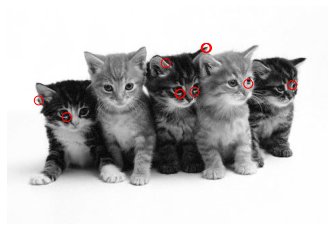

In [8]:
# variable threshold for edge detection
FAST_thresh = 100
[xs, ys] = FAST3x3(img, FAST_thresh)
# code line below for 5x5 filter
#[xs, ys] = FAST5x5(img, FAST_thresh)

# plot detected corners inside image
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
# facecolors is inner circle color, s is circle size for corners
ax.scatter(xs, ys, facecolors='none', edgecolors='r', s=80)
plt.axis("off")
plt.show()